In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from analysis_functions import *
import numpy as np

In [97]:
## Load the master z_score file (in the Google Drive)
z_scores=pd.read_csv("~/Data/Transfer/rat/BMI_genes_all_z_scores.tsv", sep="\t", index_col=0)
z_scores.head()

,z_rat,z_human,z_both,SubGraph,rat_seed,human_seed
UBE2Q1,-1.046722,-0.059048,0.061807,None,0,0
RNF14,0.246439,-0.413490,-0.101900,None,0,0
UBE2Q2,0.128908,-0.090295,-0.011640,None,0,1
TMCO1,1.451465,-0.319948,-0.464393,rat-only,0,0
UBAC1,-0.464716,1.268305,-0.589401,human-only,0,0


In [98]:
overlap = z_scores[(z_scores["rat_seed"]==1) & (z_scores["human_seed"]==1)].index.tolist()
missing_seed_genes = ["MAPKBP1", "SRP19", "RBBP6", "C11orf58", "TENM4", "PITPNC1", "REEP5", "SLC5A11"]

In [99]:
overlap = z_scores[(z_scores["rat_seed"]==1) & (z_scores["human_seed"]==1)]

In [100]:
overlap = overlap.assign(conserved=[0 if x in missing_seed_genes else 1 for x in overlap.index])

conserved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

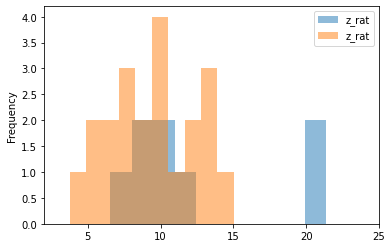

In [101]:
fig, ax = plt.subplots(1,1)
overlap.groupby("conserved").plot(kind="hist", y="z_rat", xlim=(2, 25), bins=10, ax=ax, alpha=0.5)

conserved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

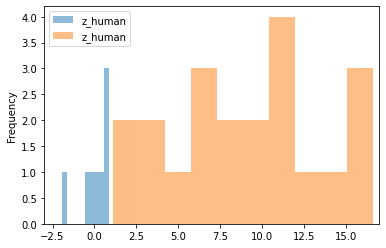

In [102]:
fig, ax = plt.subplots(1,1)
overlap.groupby("conserved").plot(kind="hist", y="z_human", xlim=(-3, 17),bins=10, ax=ax, alpha=0.5)

## Result
Missing genes are being excluded based on human z_score

## But why?

In [103]:
pc_nodes, G = load_pcnet()

number of nodes:
18820

number of edges:
2693109


### Degree

They appear to have similar degree

In [104]:
degrees = np.array([G.degree()[x] for x in G.nodes])

Text(0.5, 0, 'log10(degree)')

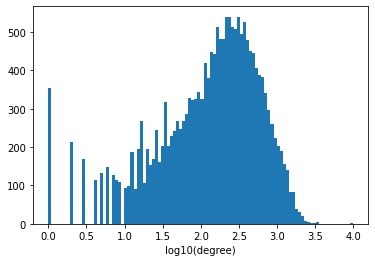

In [105]:
_ = plt.hist(np.log10(degrees), bins=100)
plt.xlabel("log10(degree)")

In [106]:
n=len(degrees)
degrees.sort()

In [107]:
overlap = overlap.assign(degree=[G.degree[x] for x in overlap.index])

In [108]:
def get_percentile(gene):
    degree = G.degree[gene]
    for i, d in enumerate(degrees):
        if degree < d:
            return i/len(degrees)
    
    

In [109]:
overlap = overlap.assign(degree_percentile=[get_percentile(x) for x in overlap.index])

conserved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

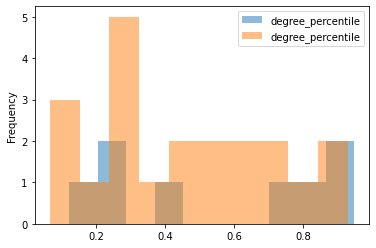

In [110]:
fig, ax = plt.subplots(1,1)
overlap.groupby("conserved").plot(kind="hist", y="degree_percentile",bins=10, ax=ax, alpha=0.5)

In [111]:
overlap

,z_rat,z_human,z_both,SubGraph,rat_seed,human_seed,conserved,degree,degree_percentile
RBBP6,9.143688,0.864612,7.905745,None,1,1,0,599,0.859299
UBR2,15.029108,16.665633,250.469601,conserved,1,1,1,856,0.930021
C11orf58,21.376714,-1.930446,-41.266600,rat-only,1,1,0,981,0.947662
REEP5,8.121855,-0.249465,-2.026122,rat-only,1,1,0,432,0.779437
SRP19,21.022496,-0.507409,-10.666995,rat-only,1,1,0,776,0.914081
PPP3CA,9.867179,11.558939,114.054121,conserved,1,1,1,733,0.902976
STK33,10.408183,11.586095,120.590197,conserved,1,1,1,179,0.519872
TBCC,13.357740,2.845800,38.013457,conserved,1,1,1,127,0.427736
MAPKBP1,11.633371,0.143226,1.666202,rat-only,1,1,0,126,0.425983
SOX6,8.858767,2.005534,17.766559,conserved,1,1,1,49,0.252285


### They are genuinely far from other human seed genes

#### Number of seed genes in first degree neighbors

In [112]:
human_seeds = [x for x in z_scores.index if z_scores.loc[x, "human_seed"]==1]

In [113]:
overlap = overlap.assign(human_neighbors=[len([n for n in G.neighbors(x) if n in human_seeds]) 
                                                                        for x in overlap.index])

In [114]:
overlap = overlap.assign(human_per=overlap.human_neighbors/overlap.degree)

In [115]:
overlap

,z_rat,z_human,z_both,SubGraph,rat_seed,human_seed,conserved,degree,degree_percentile,human_neighbors,human_per
RBBP6,9.143688,0.864612,7.905745,None,1,1,0,599,0.859299,78,0.130217
UBR2,15.029108,16.665633,250.469601,conserved,1,1,1,856,0.930021,107,0.125000
C11orf58,21.376714,-1.930446,-41.266600,rat-only,1,1,0,981,0.947662,90,0.091743
REEP5,8.121855,-0.249465,-2.026122,rat-only,1,1,0,432,0.779437,41,0.094907
SRP19,21.022496,-0.507409,-10.666995,rat-only,1,1,0,776,0.914081,81,0.104381
PPP3CA,9.867179,11.558939,114.054121,conserved,1,1,1,733,0.902976,100,0.136426
STK33,10.408183,11.586095,120.590197,conserved,1,1,1,179,0.519872,32,0.178771
TBCC,13.357740,2.845800,38.013457,conserved,1,1,1,127,0.427736,14,0.110236
MAPKBP1,11.633371,0.143226,1.666202,rat-only,1,1,0,126,0.425983,12,0.095238
SOX6,8.858767,2.005534,17.766559,conserved,1,1,1,49,0.252285,12,0.244898


conserved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

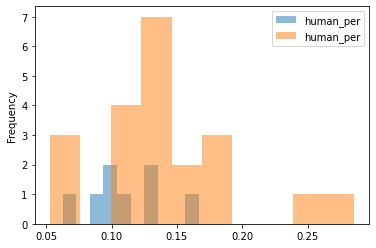

In [116]:
fig, ax = plt.subplots(1,1)
overlap.groupby("conserved").plot(kind="hist", y="human_per",bins=10, ax=ax, alpha=0.5)

### Are they false positives?

* 5/8 of the non-conserved are not in GWAS catalog for BMI specifically (not taking BMI adjusted waist hip)
* 3/21 of the conserved are not in the GWAS catalog. 

This should probably be repeated checking that we are not using the GIANT + ukbb meta analysis results from GWAS Catalog. But we could make a point that not only can we expand the overlap, we can also identify less confident findings from within the overlap itself. Could mention in relative to rat-only as a few are in there (but not all).